In [1]:
from keras.models import load_model
final_model = load_model("models\IV3_LSTM4.h5")

In [2]:
SEQUENCE_LENGTH = 3
DIM=(224,224)

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pytube import YouTube
from keras.models import load_model
from Katna.video import Video
from Katna.video import Video
from Katna.writer import KeyFrameDiskWriter
import os

In [4]:
def frames_extraction(video_path):
    frames_list = []    
    # Initialize Video module
    vd = Video()    
    # Number of images to be returned
    no_of_frames_to_returned = SEQUENCE_LENGTH
    location = 'saved_frames'
    # Initialize diskwriter to save data at desired location
    diskwriter = KeyFrameDiskWriter(location=location)    
    # Extract keyframes and process data with diskwriter
    vd.extract_video_keyframes(
        no_of_frames=no_of_frames_to_returned, file_path=video_path,
        writer=diskwriter
    )
    frames = []
    # List all files in the folder
    files = os.listdir(location)
    # Filter JPEG files
    jpeg_files = [file for file in files if file.lower().endswith('.jpeg')]
    # Read JPEG files and append to frames list
    for file in jpeg_files:
        file_path = os.path.join(location, file)
        frame = cv2.imread(file_path)  # Read image using OpenCV
        if frame is not None:
            frames.append(frame)
    # Perform necessary preprocessing
    for frame in frames:
        resized_frame = cv2.resize(frame, DIM)
        grayscale_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)
        normalized_frame = resized_frame / 255
        frames_list.append(normalized_frame)
    
    return frames_list


In [5]:
class_labels = ['VolleyballSpiking',
 'Biking',
 'HorseRiding',
 'Fencing',
 'Archery',
 'Boxing',
 'TableTennisShot',
 'GolfSwing',
 'SoccerPenalty',
 'TennisSwing',
 'Basketball',
 'Cricket',
 'Rafting',
 'Diving',
 'JavelinThrow']

def download_youtube_frames(youtube_url):
    yt = YouTube(youtube_url)
    stream = yt.streams.get_highest_resolution()
    video_path = os.path.join("", 'video.mp4')
    stream.download(output_path="", filename='video.mp4')
    return video_path

def predict_single_action(input_video_file_path, SEQUENCE_LENGTH):
    frames = frames_extraction(input_video_file_path)
    plt.figure(figsize=(15, 3))
    for i in range(SEQUENCE_LENGTH):
        plt.subplot(1, 5, i + 1)
        plt.imshow(frames[i])
        plt.axis('off')
    plt.show()
    frames = np.asarray(frames)
    frames = frames.reshape(-1, SEQUENCE_LENGTH, DIM[0], DIM[1], 3)
    
    prediction = final_model.predict(frames)
#     print(prediction)
    predicted_label = np.argmax(prediction, axis=1)
    
    print("Predicted label: ", predicted_label)
    print("Predicted Action: ", class_labels[predicted_label[0]])
    
    print()
    print()
    # also print confidence level top 3 predictions
    top_3_predictions = np.argsort(prediction[0])[::-1][:3]
    for i in range(3):
        print(f"Predicted Class: {class_labels[top_3_predictions[i]]} ------> confidence : {prediction[0][top_3_predictions[i]]}")

    
    return predicted_label[0]


Completed processing for :  video.mp4


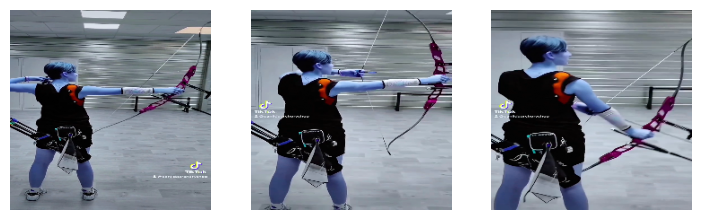

1/1 [==============================] - 5s 5s/step
Predicted label:  [4]
Predicted Action:  Archery


Predicted Class: Archery ------> confidence : 0.6799459457397461
Predicted Class: TableTennisShot ------> confidence : 0.14960087835788727
Predicted Class: VolleyballSpiking ------> confidence : 0.05317310988903046


In [6]:
# Archery
video_link = 'https://www.youtube.com/shorts/myEI8NRYhiI'
video_path = download_youtube_frames(video_link)
input_video_file_path = 'video.mp4'
final_output = predict_single_action(input_video_file_path, SEQUENCE_LENGTH)

Completed processing for :  video.mp4


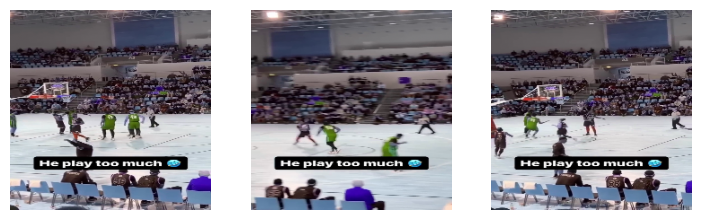

1/1 [==============================] - 0s 156ms/step
Predicted label:  [10]
Predicted Action:  Basketball


Predicted Class: Basketball ------> confidence : 0.9823819994926453
Predicted Class: Diving ------> confidence : 0.008584903553128242
Predicted Class: JavelinThrow ------> confidence : 0.002459014533087611


In [ ]:
#  'Basketball' 
video_link = 'https://www.youtube.com/shorts/vgVPRHVZ-M8'
video_path = download_youtube_frames(video_link)
input_video_file_path = 'video.mp4'
final_output = predict_single_action(input_video_file_path, SEQUENCE_LENGTH)

Completed processing for :  video.mp4


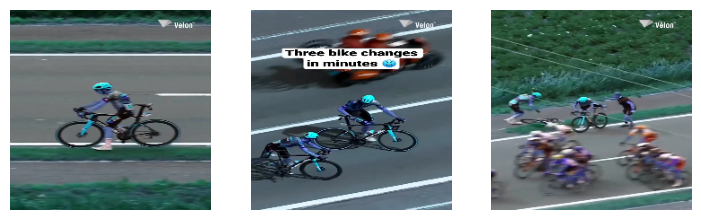

1/1 [==============================] - 0s 177ms/step
Predicted label:  [1]
Predicted Action:  Biking


Predicted Class: Biking ------> confidence : 0.9665271639823914
Predicted Class: HorseRiding ------> confidence : 0.021459758281707764
Predicted Class: JavelinThrow ------> confidence : 0.005444936454296112


In [ ]:
#  'Biking'
video_link = 'https://www.youtube.com/shorts/MwOiBI8edDg'
video_path = download_youtube_frames(video_link)
input_video_file_path = 'video.mp4'
final_output = predict_single_action(input_video_file_path, SEQUENCE_LENGTH)

Completed processing for :  video.mp4


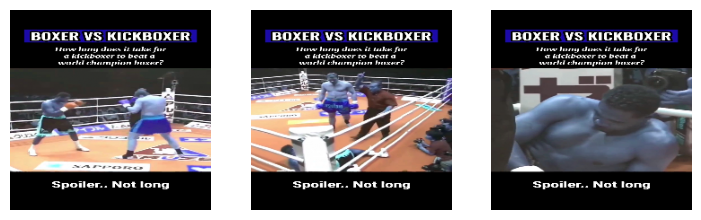

1/1 [==============================] - 0s 108ms/step
Predicted label:  [5]
Predicted Action:  Boxing


Predicted Class: Boxing ------> confidence : 0.7802345752716064
Predicted Class: Fencing ------> confidence : 0.11944574862718582
Predicted Class: TableTennisShot ------> confidence : 0.04277212545275688


In [ ]:
# Boxing
video_link = 'https://www.youtube.com/shorts/w4C3Hd3-A6Y'
video_path = download_youtube_frames(video_link)
input_video_file_path = 'video.mp4'
final_output = predict_single_action(input_video_file_path, SEQUENCE_LENGTH)

Completed processing for :  video.mp4


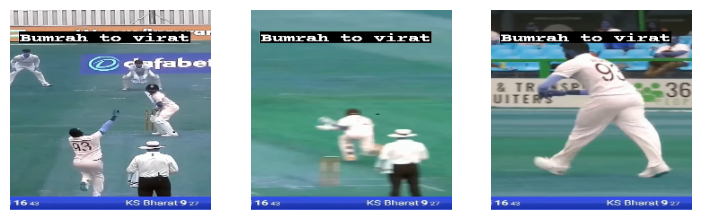

1/1 [==============================] - 0s 136ms/step
Predicted label:  [11]
Predicted Action:  Cricket


Predicted Class: Cricket ------> confidence : 0.7507336139678955
Predicted Class: Rafting ------> confidence : 0.07744772732257843
Predicted Class: Archery ------> confidence : 0.05495879799127579


In [ ]:
#  cricket
video_link = 'https://www.youtube.com/shorts/aVC65j5IM40'
video_path = download_youtube_frames(video_link)
input_video_file_path = 'video.mp4'
final_output = predict_single_action(input_video_file_path, SEQUENCE_LENGTH)

Completed processing for :  video.mp4


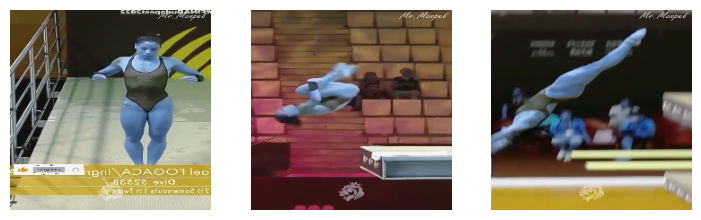

1/1 [==============================] - 1s 1s/step
Predicted label:  [5]
Predicted Action:  Boxing


Predicted Class: Boxing ------> confidence : 0.5644193291664124
Predicted Class: Rafting ------> confidence : 0.1338777244091034
Predicted Class: Diving ------> confidence : 0.06453707069158554


In [ ]:
#  'Diving' -------wrong prediction-------------
video_link = 'https://www.youtube.com/shorts/l7IBzKdN3YI'
video_path = download_youtube_frames(video_link)
input_video_file_path = 'video.mp4'
final_output = predict_single_action(input_video_file_path, SEQUENCE_LENGTH)

Completed processing for :  video.mp4


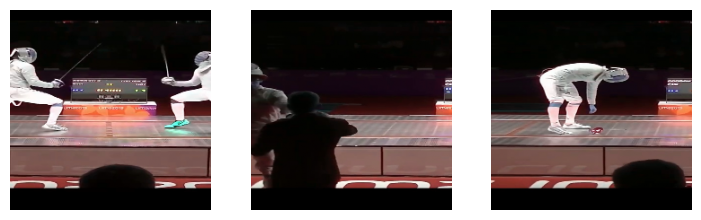

1/1 [==============================] - 0s 115ms/step
Predicted label:  [3]
Predicted Action:  Fencing


Predicted Class: Fencing ------> confidence : 0.5041091442108154
Predicted Class: Rafting ------> confidence : 0.14519912004470825
Predicted Class: Boxing ------> confidence : 0.11096615344285965


In [ ]:
#  'Fencing'
video_link = 'https://www.youtube.com/shorts/l6nusgNHmlk'
video_path = download_youtube_frames(video_link)
input_video_file_path = 'video.mp4'
final_output = predict_single_action(input_video_file_path, SEQUENCE_LENGTH)

Completed processing for :  video.mp4


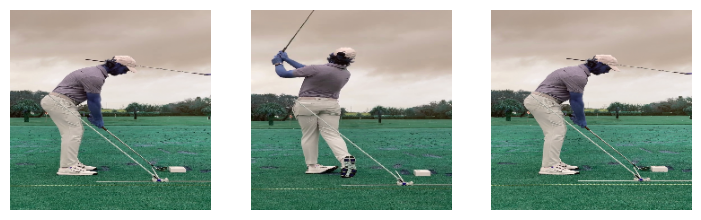

1/1 [==============================] - 0s 127ms/step
Predicted label:  [7]
Predicted Action:  GolfSwing


Predicted Class: GolfSwing ------> confidence : 0.9819604158401489
Predicted Class: Archery ------> confidence : 0.007166486699134111
Predicted Class: Rafting ------> confidence : 0.0027168067172169685


In [ ]:
#  'GolfSwin'
video_link = 'https://www.youtube.com/shorts/2D5SxTIRGBg'
video_path = download_youtube_frames(video_link)
input_video_file_path = 'video.mp4'
final_output = predict_single_action(input_video_file_path, SEQUENCE_LENGTH)

Completed processing for :  video.mp4


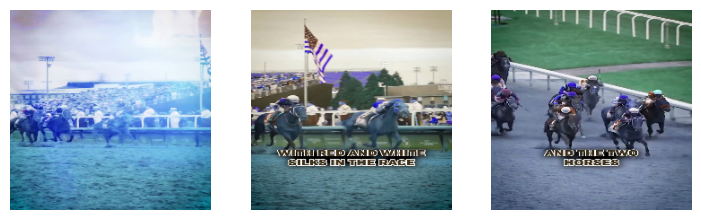

1/1 [==============================] - 0s 312ms/step
Predicted label:  [2]
Predicted Action:  HorseRiding


Predicted Class: HorseRiding ------> confidence : 0.9649806618690491
Predicted Class: Biking ------> confidence : 0.014136248268187046
Predicted Class: JavelinThrow ------> confidence : 0.007498738821595907


In [ ]:
# HourseRiding
video_link = 'https://www.youtube.com/shorts/vxH5UaeHcVU'
video_path = download_youtube_frames(video_link)
input_video_file_path = 'video.mp4'
final_output = predict_single_action(input_video_file_path, SEQUENCE_LENGTH)

Completed processing for :  video.mp4


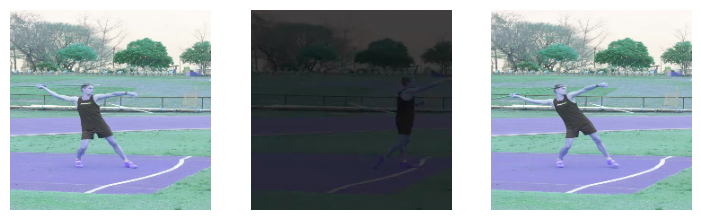

1/1 [==============================] - 0s 122ms/step
Predicted label:  [7]
Predicted Action:  GolfSwing


Predicted Class: GolfSwing ------> confidence : 0.8644513487815857
Predicted Class: JavelinThrow ------> confidence : 0.04570896551012993
Predicted Class: Rafting ------> confidence : 0.023574223741889


In [ ]:
#  'JavelinThrow' ------wrong prediction-------------
video_link = 'https://www.youtube.com/shorts/cz07uH4AcYI'
video_path = download_youtube_frames(video_link)
input_video_file_path = 'video.mp4'
final_output = predict_single_action(input_video_file_path, SEQUENCE_LENGTH)

Completed processing for :  video.mp4


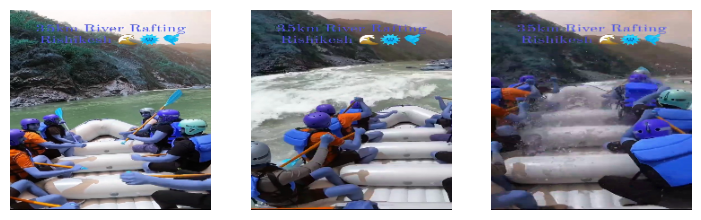

1/1 [==============================] - 0s 152ms/step
Predicted label:  [12]
Predicted Action:  Rafting


Predicted Class: Rafting ------> confidence : 0.6521696448326111
Predicted Class: Boxing ------> confidence : 0.2513577342033386
Predicted Class: Basketball ------> confidence : 0.026747437193989754


In [ ]:
#  Rafting
video_link = 'https://www.youtube.com/shorts/ViEcBQp8LE4'
video_path = download_youtube_frames(video_link)
input_video_file_path = 'video.mp4'
final_output = predict_single_action(input_video_file_path, SEQUENCE_LENGTH)

Completed processing for :  video.mp4


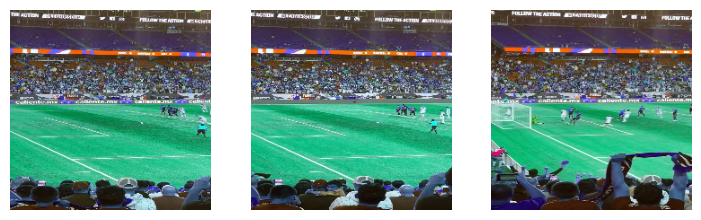

1/1 [==============================] - 0s 137ms/step
Predicted label:  [14]
Predicted Action:  JavelinThrow


Predicted Class: JavelinThrow ------> confidence : 0.44173407554626465
Predicted Class: HorseRiding ------> confidence : 0.3196609318256378
Predicted Class: Rafting ------> confidence : 0.08922343701124191


In [ ]:
# Soccerpenalty
video_link = 'https://www.youtube.com/shorts/u8bh0D0xmBk'
video_path = download_youtube_frames(video_link)
input_video_file_path = 'video.mp4'
final_output = predict_single_action(input_video_file_path, SEQUENCE_LENGTH)

Completed processing for :  video.mp4


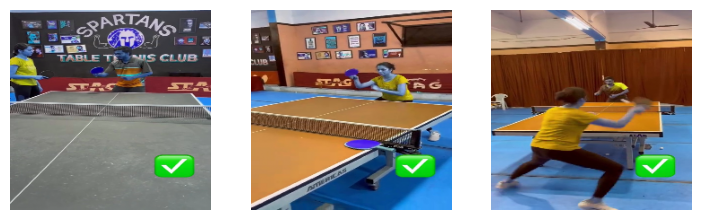

1/1 [==============================] - 3s 3s/step
Predicted label:  [5]
Predicted Action:  Boxing


Predicted Class: Boxing ------> confidence : 0.4015430510044098
Predicted Class: Rafting ------> confidence : 0.2551936209201813
Predicted Class: Fencing ------> confidence : 0.06848422437906265


In [ ]:
# TableTennisShot --------wrong prediction-----------
video_link = 'https://www.youtube.com/shorts/nGMXj57WRfs'
video_path = download_youtube_frames(video_link)
input_video_file_path = 'video.mp4'
final_output = predict_single_action(input_video_file_path, SEQUENCE_LENGTH)


Completed processing for :  video.mp4


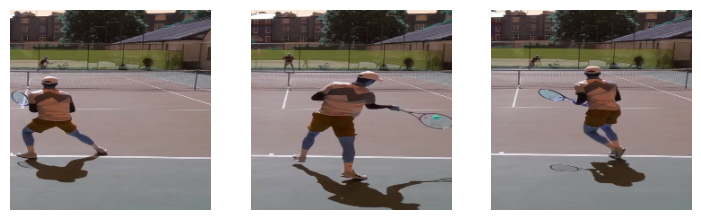

1/1 [==============================] - 0s 125ms/step
Predicted label:  [9]
Predicted Action:  TennisSwing


Predicted Class: TennisSwing ------> confidence : 0.5647820234298706
Predicted Class: JavelinThrow ------> confidence : 0.32328271865844727
Predicted Class: GolfSwing ------> confidence : 0.03977063670754433


In [ ]:
# TennisSwing
video_link = 'https://www.youtube.com/shorts/ZoO8eXV1h_Q'
video_path = download_youtube_frames(video_link)
input_video_file_path = 'video.mp4'
final_output = predict_single_action(input_video_file_path, SEQUENCE_LENGTH)


Completed processing for :  video.mp4


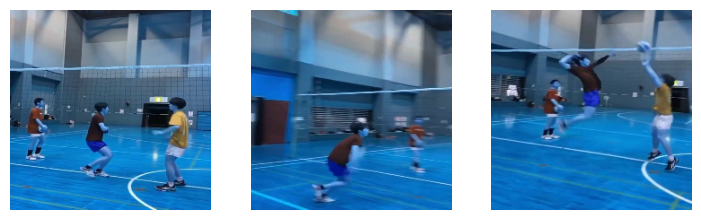

1/1 [==============================] - 3s 3s/step
Predicted label:  [0]
Predicted Action:  VolleyballSpiking


Predicted Class: VolleyballSpiking ------> confidence : 0.6578477025032043
Predicted Class: TennisSwing ------> confidence : 0.07996587455272675
Predicted Class: Diving ------> confidence : 0.06517627090215683


In [ ]:
# 'VolleyballSpiking'
video_link = 'https://www.youtube.com/shorts/xnX6X0PCD1o'
video_path = download_youtube_frames(video_link)
input_video_file_path = 'video.mp4'
final_output = predict_single_action(input_video_file_path, SEQUENCE_LENGTH)